<a href="https://colab.research.google.com/github/Ellie1220/Insight-Impact/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting Key Insights into Factors Contributing to Underserved Status**
Accessing comprehensive data from the Federal Housing Finance Agency (FHFA) is crucial for understanding and addressing underserved areas. Utilizing FHFA's data tools, such as the Underserved Areas Data, available here, offers a valuable opportunity to explore the intricacies of regions grappling with housing finance challenges.

For our analysis, we will focus on the years from 2018 to 2023 within Massachusetts. This time frame enables us to dynamically examine trends, facilitating a nuanced comprehension of factors contributing to underserved status across the state.

Our objective is to unearth critical insights shedding light on the multifaceted nature of underserved areas.

# **Exploring Variables for Understanding Underserved Status**
In our quest to dissect factors contributing to underserved status, we will delve into various variables present in the dataset:

**STATE:** This variable denotes the 2-digit numeric state FIPS (Federal Information Processing Standards) code. For example, Massachusetts is represented as 25.

**CNTY:** The 3-digit numeric county FIPS code, providing a specific identifier for each county within a state.

**TRACT:** The 6-digit 2020 Census tract code, where two decimals are implied. This code delineates specific geographical areas for census data collection and analysis.

**MSA2018:** A 5-digit OMB (Office of Management and Budget) MSA designator that represents the Metropolitan Statistical Area as specified by OMB.

**LYA:** A 1-digit code indicating low-income areas:

**LYA=1:** Signifies that the tract median income is at or below 80 percent of the applicable Area Median Income (AMI), indicating households with incomes typically below 80 percent of the area's median income.

**LYA=0:** Indicates tract median income above 80 percent of the AMI, suggesting higher-income households.

**LYA=9:** Implies missing data for either tract median income or AMI, indicating potential data unavailability or inapplicability.

**PCTMIN:** Represents the percentage of the minority population in the census tract.

**MIN_TRCT:** A 1-digit code designating minority tracts:

**MIN_TRCT=1:** Indicates tracts with a minority population of at least 30 percent and a median income below 100 percent of the AMI, suggesting areas with significant minority populations and lower incomes.

**MIN_TRCT=0:** Denotes tracts with a minority population of less than 30 percent or a median income of 100 percent or more of the AMI, potentially indicating areas with fewer minority populations or higher median incomes.

**MIN_TRCT=9:** Suggests missing data for either minority population percentage or median income, indicating potential data unavailability or inapplicability.
CENINC: Represents the median income based on 5-year American Community Survey (ACS) data for 2020 Census tract boundary definitions. A zero indicates missing tract median income.

**MEDINC:** Signifies MSA area median income based on 5-year ACS data, adjusted for nonmetropolitan counties if necessary.

**DDA:** A 1-digit code indicating whether a census tract is in a designated disaster area eligible for individual assistance within the past three years:

**DDA=1:** Indicates tract location in a designated disaster area, implying significant disaster events warranting federal assistance.

**DDA=0:** Denotes tract location not in a designated disaster area within the past three years, suggesting the absence of significant disaster events.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file_path = '/content/ARAES DATA.xlsx'

# Read the Excel file into a pandas DataFrame
UNDERSERVED_AREA = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame to verify that it was loaded correctly
print(UNDERSERVED_AREA.head())

   YEAR  STATE  CNTY  TRACT  MSA2018  LYA  PCTMIN  MIN_TRCT  CENINC  MEDINC  \
0  2023     25     1  10100    12700    0  14.956         0   96979  107577   
1  2023     25     1  10206    12700    0   9.310         0  123646  107577   
2  2023     25     1  10208    12700    0  10.391         0  118750  107577   
3  2023     25     1  10304    12700    0   9.918         0  108077  107577   
4  2023     25     1  10306    12700    1   9.838         0   82969  107577   

   DDA  
0    0  
1    0  
2    0  
3    0  
4    0  


In [ ]:
UNDERSERVED_AREA

,YEAR,STATE,CNTY,TRACT,MSA2018,LYA,PCTMIN,MIN_TRCT,CENINC,MEDINC,DDA
0,2023,25,1,10100,12700,0,14.956,0,96979,107577,0
1,2023,25,1,10206,12700,0,9.310,0,123646,107577,0
2,2023,25,1,10208,12700,0,10.391,0,118750,107577,0
3,2023,25,1,10304,12700,0,9.918,0,108077,107577,0
4,2023,25,1,10306,12700,1,9.838,0,82969,107577,0
...,...,...,...,...,...,...,...,...,...,...,...
8920,2018,25,27,760100,49340,0,3.687,0,71902,83776,0
8921,2018,25,27,761100,49340,0,4.713,0,75550,83776,0
8922,2018,25,27,761200,49340,0,31.540,0,112523,83776,0
8923,2018,25,27,761300,49340,0,8.401,0,110815,83776,0


In [ ]:
UNDERSERVED_AREA.columns
UNDERSERVED_AREA.dtypes

YEAR          int64
STATE         int64
CNTY          int64
TRACT         int64
MSA2018       int64
LYA           int64
PCTMIN      float64
MIN_TRCT      int64
CENINC        int64
MEDINC        int64
DDA           int64
dtype: object

In [ ]:
UNDERSERVED_AREA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      8925 non-null   int64  
 1   STATE     8925 non-null   int64  
 2   CNTY      8925 non-null   int64  
 3   TRACT     8925 non-null   int64  
 4   MSA2018   8925 non-null   int64  
 5   LYA       8925 non-null   int64  
 6   PCTMIN    8925 non-null   float64
 7   MIN_TRCT  8925 non-null   int64  
 8   CENINC    8925 non-null   int64  
 9   MEDINC    8925 non-null   int64  
 10  DDA       8925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 767.1 KB


In [ ]:
UNDERSERVED_AREA.describe()

,YEAR,STATE,CNTY,TRACT,MSA2018,LYA,PCTMIN,MIN_TRCT,CENINC,MEDINC,DDA
count,8925.000000,8925.0,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.0
mean,2020.551821,25.0,16.714734,431468.288964,24944.641905,0.308459,27.920432,0.288964,103838.372325,101177.816471,0.0
std,1.717409,0.0,7.756706,258749.235446,15777.996367,0.461883,24.195199,0.453306,47130.932206,14993.268926,0.0
min,2018.000000,25.0,1.000000,100.000000,12700.000000,0.000000,1.670000,0.000000,12386.000000,69235.000000,0.0
25%,2019.000000,25.0,9.000000,250800.000000,14460.000000,0.000000,9.252000,0.000000,70595.000000,89555.000000,0.0
50%,2021.000000,25.0,17.000000,383300.000000,14460.000000,0.000000,19.061000,0.000000,98854.000000,102945.000000,0.0
75%,2022.000000,25.0,23.000000,652700.000000,39300.000000,1.000000,39.654000,1.000000,129107.000000,112786.000000,0.0
max,2023.000000,25.0,27.000000,985600.000000,99999.000000,1.000000,99.081000,1.000000,250001.000000,123334.000000,0.0


### **Data Visualization**

<Axes: >

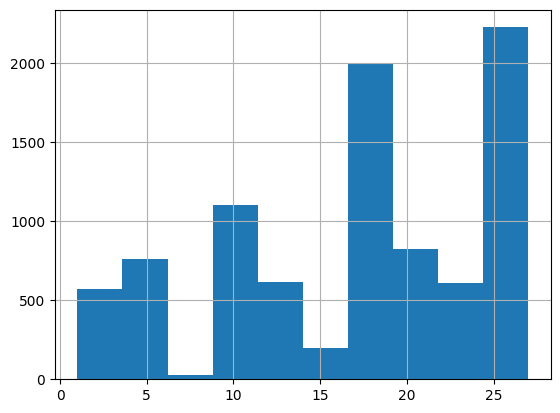

In [ ]:
UNDERSERVED_AREA.CNTY.hist()

<Axes: >

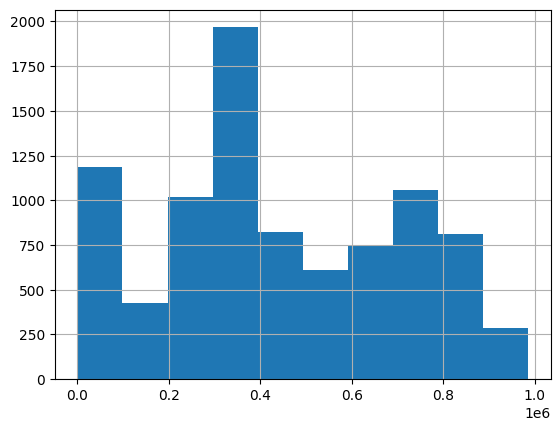

In [ ]:
UNDERSERVED_AREA.TRACT.hist()

<Axes: >

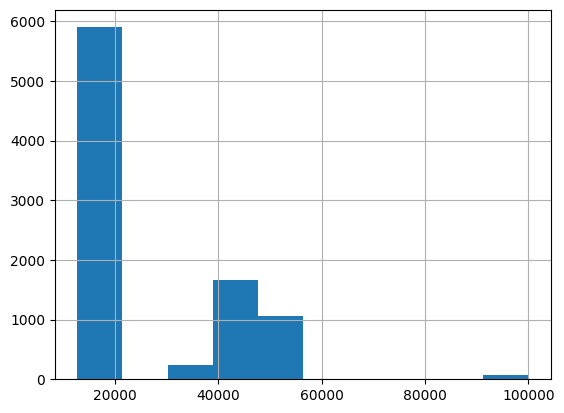

In [ ]:
UNDERSERVED_AREA.MSA2018.hist()

<Axes: >

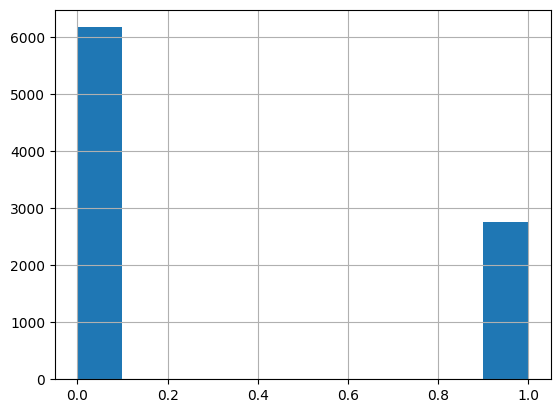

In [ ]:
UNDERSERVED_AREA.LYA.hist()

<Axes: >

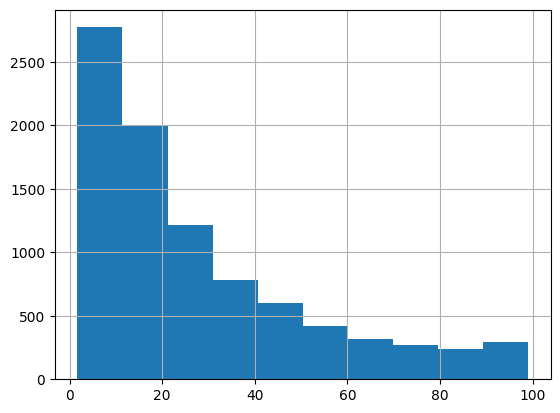

In [ ]:
UNDERSERVED_AREA.PCTMIN.hist()

<Axes: >

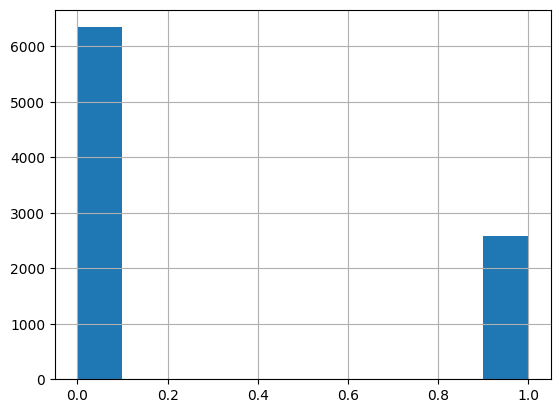

In [ ]:
UNDERSERVED_AREA.MIN_TRCT.hist()

<Axes: >

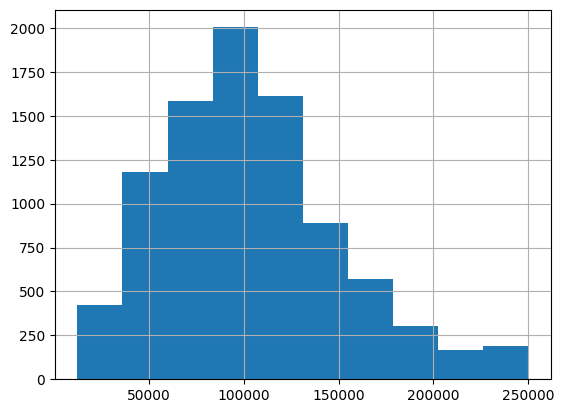

In [ ]:
UNDERSERVED_AREA.CENINC.hist()

<Axes: >

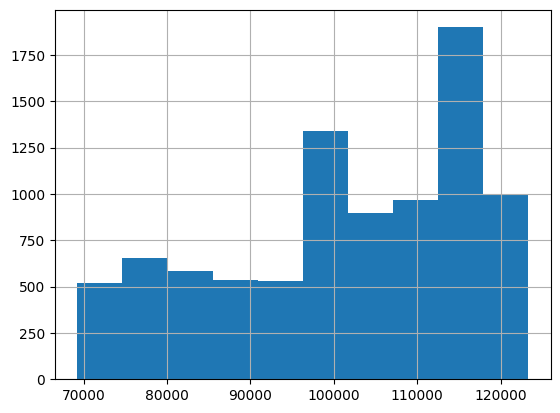

In [ ]:
UNDERSERVED_AREA.MEDINC.hist()

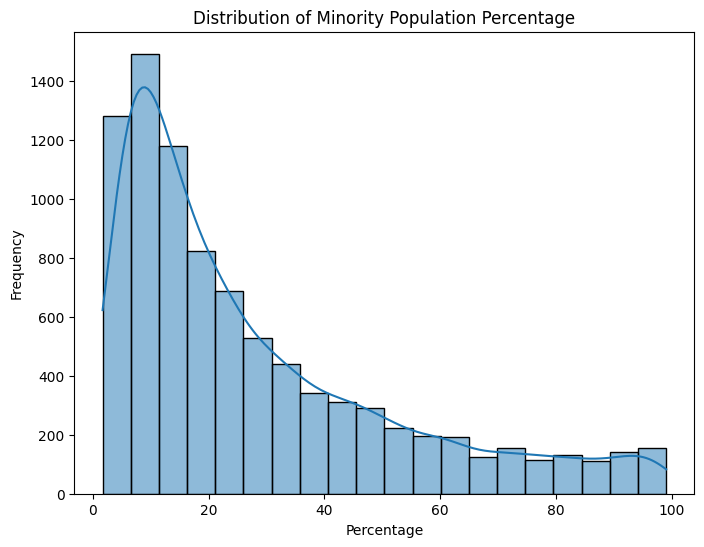

In [ ]:
#Distribution of minority population percentage
plt.figure(figsize=(8, 6))
sns.histplot(UNDERSERVED_AREA['PCTMIN'], bins=20, kde=True)
plt.title('Distribution of Minority Population Percentage')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

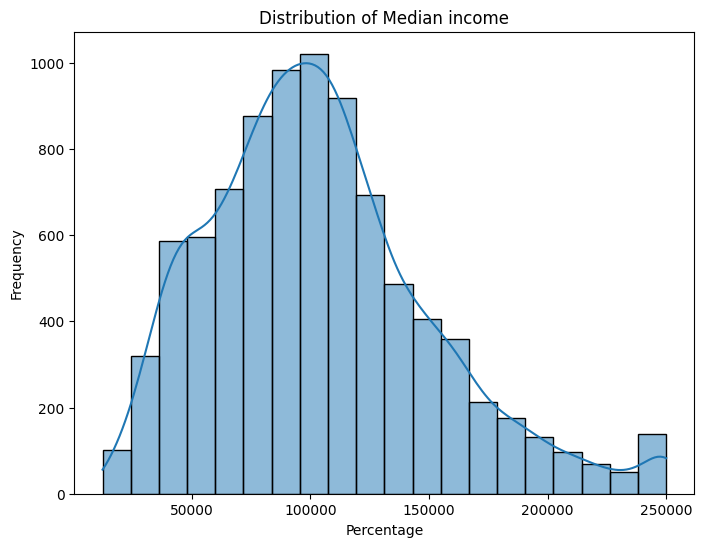

In [ ]:
#Distribution of Median income based on 5-year ACS data for 2020 Census tract boundary
plt.figure(figsize=(8, 6))
sns.histplot(UNDERSERVED_AREA['CENINC'], bins=20, kde=True)
plt.title('Distribution of Median income')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

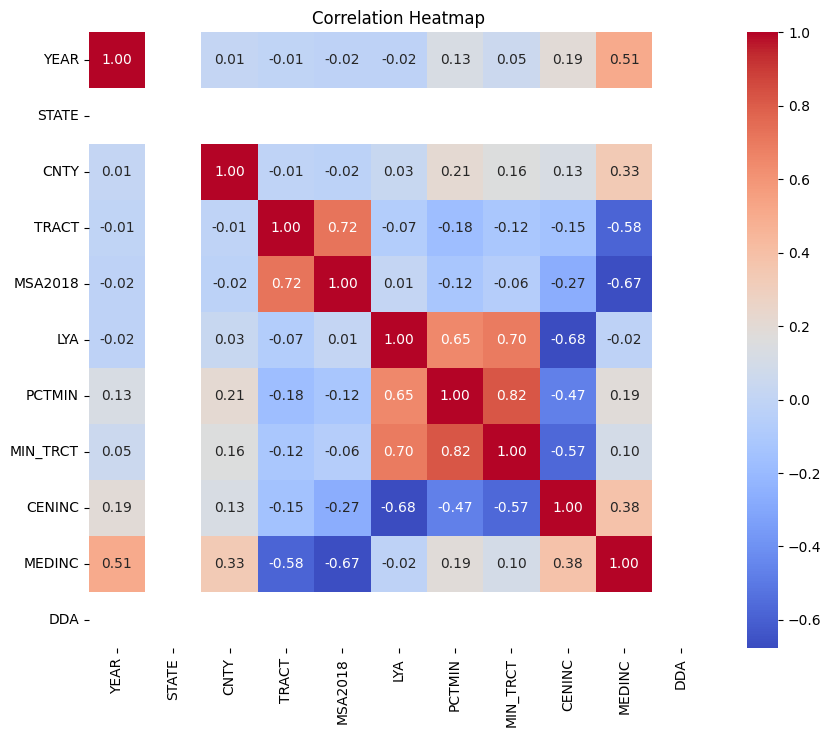

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(UNDERSERVED_AREA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

we can see several notable correlations:

- TRACT and MSA2018 have a strong positive correlation of 0.72, indicating that these two variables tend to increase together.
- LYA and PCTMIN also show a strong positive correlation of 0.65.
- LYA and MIN_TRCT have a positive correlation of 0.70.
- PCTMIN and MIN_TRCT have a very strong positive correlation of 1.00, suggesting that they might be the same variable or very closely related.
- MSA2018 and CENINC show a strong negative correlation of -0.67, indicating that as one increases, the other tends to decrease.
- MEDINC has a strong positive correlation with YEAR of 0.51, suggesting some relationship over time.
- DDA also has a moderate positive correlation with STATE of 0.33 and CENINC of 0.38.

The variables on the heatmap seem to be related to demographic or geographic data, possibly from a census or a study of economic factors. YEAR likely represents the year data was collected, STATE might refer to US states, CNTY could stand for county, TRACT might be a census tract, MSA2018 could refer to the Metropolitan Statistical Area as defined in 2018, LYA could be an acronym for a specific demographic metric, PCTMIN might represent the percentage of minorities, MIN_TRCT could be a minority tract metric, CENINC could be the central tendency of income, MEDINC might be median income, and DDA is not immediately clear but could be another demographic or economic indicator.

Correlation heatmaps are useful for quickly identifying relationships between multiple variables, which can be helpful for further statistical analysis or predictive modeling. However, it's important to remember that correlation does not imply causation. Further analysis is required to understand the nature of these relationships.

In [ ]:
#Create a new feature 'Income Difference' by subtracting median income from central income
UNDERSERVED_AREA['Income Difference'] = UNDERSERVED_AREA['CENINC'] - UNDERSERVED_AREA['MEDINC']

In [ ]:
UNDERSERVED_AREA

,YEAR,STATE,CNTY,TRACT,MSA2018,LYA,PCTMIN,MIN_TRCT,CENINC,MEDINC,DDA,Income Difference
0,2023,25,1,10100,12700,0,14.956,0,96979,107577,0,-10598
1,2023,25,1,10206,12700,0,9.310,0,123646,107577,0,16069
2,2023,25,1,10208,12700,0,10.391,0,118750,107577,0,11173
3,2023,25,1,10304,12700,0,9.918,0,108077,107577,0,500
4,2023,25,1,10306,12700,1,9.838,0,82969,107577,0,-24608
...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2018,25,27,760100,49340,0,3.687,0,71902,83776,0,-11874
8921,2018,25,27,761100,49340,0,4.713,0,75550,83776,0,-8226
8922,2018,25,27,761200,49340,0,31.540,0,112523,83776,0,28747
8923,2018,25,27,761300,49340,0,8.401,0,110815,83776,0,27039


### **By County**

In [ ]:
county_data = UNDERSERVED_AREA.groupby('CNTY').agg({
    'PCTMIN': 'mean',   # Mean percentage of minority population
    'CENINC': 'median', # Median central income
    'MEDINC': 'median'  # Median income
}).reset_index()
print(county_data)


    CNTY     PCTMIN    CENINC    MEDINC
0      1  10.808905   91347.0   91523.5
1      3  10.190212   81766.0   79227.0
2      5  19.958384   79889.5   86575.0
3      7  16.126917  100416.5  103771.0
4      9  28.492957   98056.0  112786.0
5     11   9.659182   78992.5   78458.0
6     13  38.009686   67679.0   74038.0
7     15  14.909467   94375.0   74038.0
8     17  27.757073  126483.5  112786.0
9     19  18.555931  114779.0  116193.0
10    21  23.163834  125679.0  112786.0
11    23  19.326510  105712.5  112786.0
12    25  52.002994   79265.0  112786.0
13    27  23.749745   92039.0   94367.0


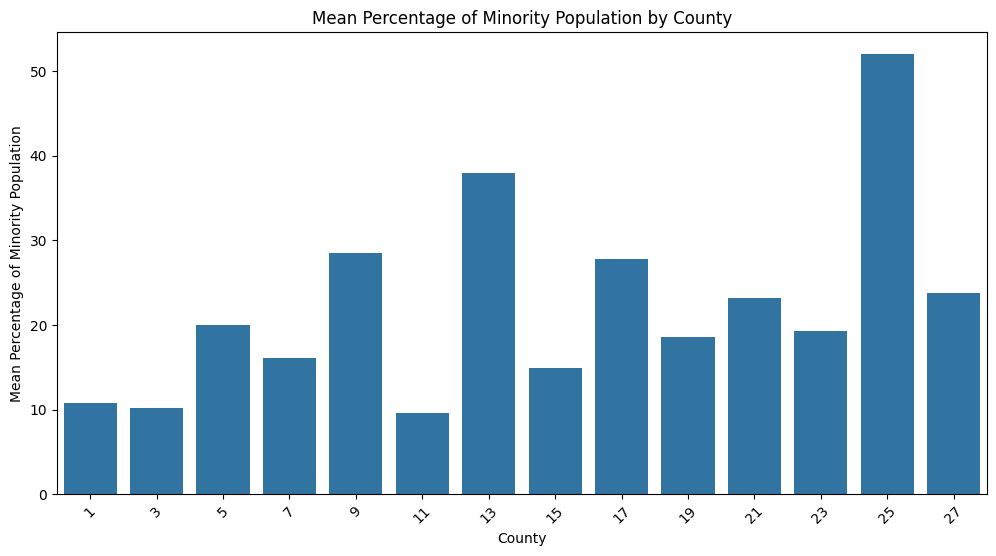

In [ ]:
#Bar chart of mean percentage of minority population by county
plt.figure(figsize=(12, 6))
sns.barplot(data=county_data, x='CNTY', y='PCTMIN')
plt.title('Mean Percentage of Minority Population by County')
plt.xlabel('County')
plt.ylabel('Mean Percentage of Minority Population')
plt.xticks(rotation=45)
plt.show()

#25:Suffolk County
#13:Hampden County
#9:Essex County
#27:Worcester County
#17:Middlesex County
#21:Norfolk County

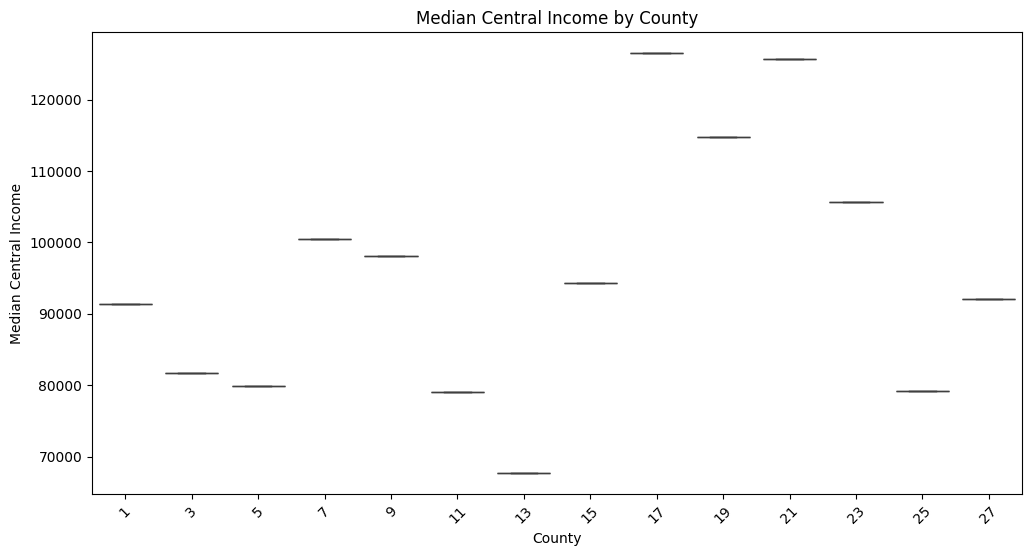

In [ ]:
# Example: Box plot of median central income by county
plt.figure(figsize=(12, 6))
sns.boxplot(data=county_data, x='CNTY', y='CENINC')
plt.title('Median Central Income by County')
plt.xlabel('County')
plt.ylabel('Median Central Income')
plt.xticks(rotation=45)
plt.show()


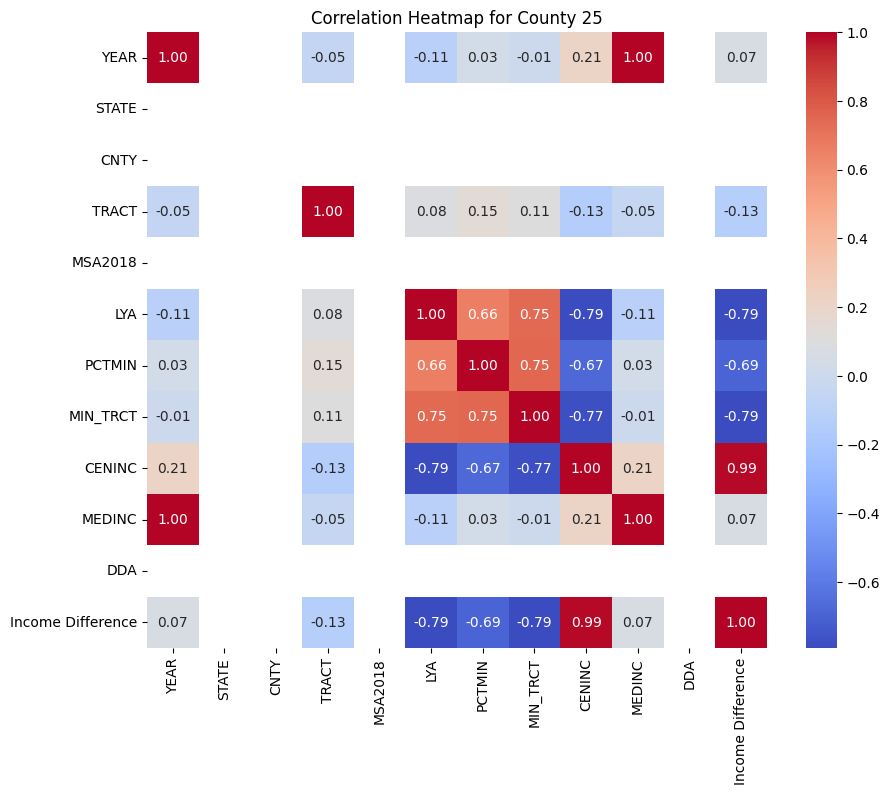

In [ ]:
#Correlation heatmap for a specific county
county_subset = UNDERSERVED_AREA[UNDERSERVED_AREA['CNTY'] == 25]
plt.figure(figsize=(10, 8))
sns.heatmap(county_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for County {}'.format(25))
plt.show()


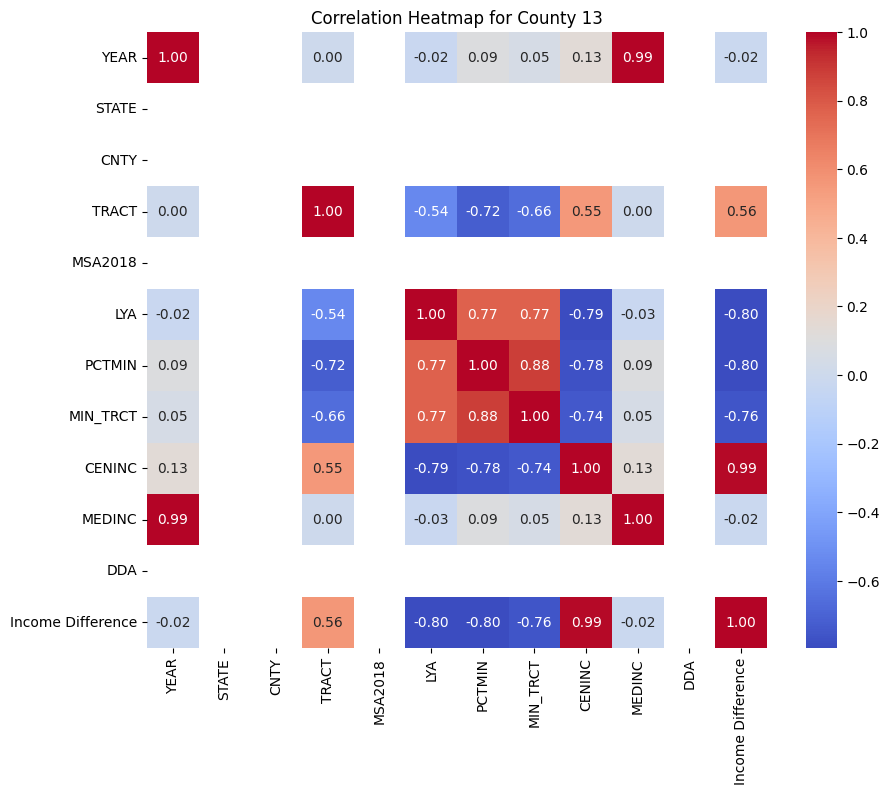

In [ ]:
#Correlation heatmap for a specific county
county_subset = UNDERSERVED_AREA[UNDERSERVED_AREA['CNTY'] == 13]
plt.figure(figsize=(10, 8))
sns.heatmap(county_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for County {}'.format(13))
plt.show()

 This type of heatmap displays the correlation coefficients between different variables, indicating the strength and direction of their relationships. The heatmap is titled "Correlation Heatmap for County 25," which suggests it is showing data specifically for this geographical area. Here's a detailed explanation of the elements in the heatmap:

- *Correlation Coefficient:* The values in each cell range from -1 to 1, where 1 represents a perfect positive correlation, 0 represents no correlation, and -1 represents a perfect negative correlation.

- *Color Coding:* Similar to the previous heatmap, the color intensity reflects the strength of the correlation. Red indicates positive correlation, blue indicates negative correlation, and the intensity of the color corresponds to the strength of the correlation.

- *Diagonal:* The diagonal from the top left to the bottom right shows perfect positive correlations of 1. This is because it's correlating each variable with itself.

- *Notable Correlations:*
  - LYA is strongly positively correlated with both PCTMIN (0.66) and MIN_TRCT (0.75), suggesting that whatever LYA represents, it moves together with the percentage of minorities (PCTMIN) and the minority tract metric (MIN_TRCT).
  - CENINC (presumably central income) has strong negative correlations with LYA (-0.79), PCTMIN (-0.67), and MIN_TRCT (-0.77). This could imply that as LYA, PCTMIN, or MIN_TRCT increase, the central income tends to decrease.
  - MEDINC (median income) has a perfect positive correlation (1) with YEAR, indicating that as years progress, median income also increases.
  - Income Difference has a very strong positive correlation with CENINC (0.99), which could suggest that this metric is directly related to the differences in income, perhaps within the county or compared to another benchmark.

- *Variables:*
  - YEAR, STATE, CNTY, and TRACT likely represent temporal and geographical identifiers.
  - MSA2018 could be related to the Metropolitan Statistical Area as defined in the year 2018.
  - LYA, PCTMIN, and MIN_TRCT seem to be demographic indicators, possibly related to age and minority statistics.
  - CENINC and MEDINC are income metrics, presumably central and median income, respectively.
  - DDA is not clearly defined but seems to be another demographic or economic indicator.
  - Income Difference appears to be a calculated variable that measures the difference in income, potentially within the county or in comparison to another area or time.

The purpose of this heatmap is to identify and visually represent the strength and direction of relationships between various demographic and economic indicators within County 25. This can be particularly useful for data analysts or policymakers to understand the dynamics within the county and to identify areas of interest for further analysis or intervention.

In [ ]:
low_income_areas = UNDERSERVED_AREA[UNDERSERVED_AREA['LYA'] == 1]
non_low_income_areas = UNDERSERVED_AREA[UNDERSERVED_AREA['LYA'] == 0]


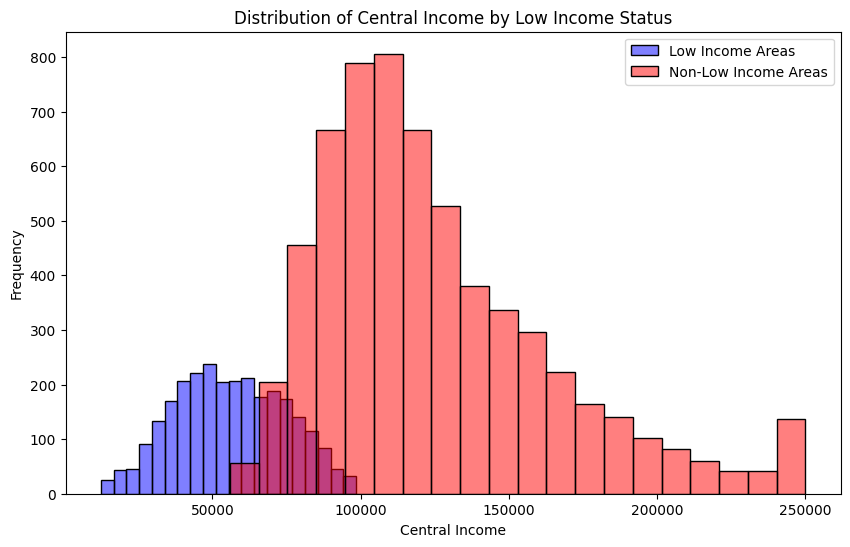

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(low_income_areas['CENINC'], bins=20, color='blue', alpha=0.5, label='Low Income Areas')
sns.histplot(non_low_income_areas['CENINC'], bins=20, color='red', alpha=0.5, label='Non-Low Income Areas')
plt.title('Distribution of Central Income by Low Income Status')
plt.xlabel('Central Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(low_income_areas['CENINC'], non_low_income_areas['CENINC'])
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -86.96650709924005
P-value: 0.0


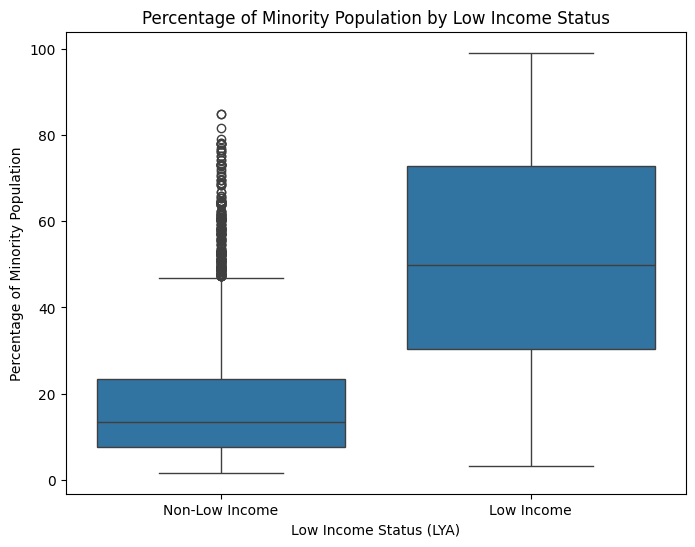

In [ ]:
# Example: Box plot of percentage of minority population by low-income status
plt.figure(figsize=(8, 6))
sns.boxplot(data=UNDERSERVED_AREA, x='LYA', y='PCTMIN')
plt.title('Percentage of Minority Population by Low Income Status')
plt.xlabel('Low Income Status (LYA)')
plt.ylabel('Percentage of Minority Population')
plt.xticks([0, 1], ['Non-Low Income', 'Low Income'])
plt.show()


a box plot comparing the percentage of the minority population by low-income status. There are two categories on the x-axis: "Non-Low Income" and "Low Income." The y-axis shows the percentage of the minority population.

From the box plot, it seems that the "Low Income" category has a higher median percentage of minority population compared to the "Non-Low Income" category. This is indicated by the line within the box, which represents the median value. Additionally, the "Low Income" box itself extends higher on the y-axis, suggesting a greater range and possibly higher values overall for the percentage of the minority population.

While this plot does show a higher percentage of minority population within the "Low Income" category, it does not necessarily mean that being low income causes one to be a minority or vice versa. Rather, it shows an association between low income status and a higher percentage of minority population in the dataset used for this plot.

Box plots are descriptive and do not provide statistical tests of causation. To determine if there is a causal relationship, further statistical analysis would be required, controlling for other variables that might affect both income status and minority status.